/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 60, 6)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 58, 128)        │          2,432 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 58, 128)        │            512 │ conv1d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_6 (LSTM)             │ (None, 58, 128)        │        131,584 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_3 (Attention)   │ (None, 58, 128)        │              0 │ lstm_6[0][0],          │
│                           │                        │                │ lstm_6[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 58, 128)        │              0 │ attention_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_7 (LSTM)             │ (None, 64)             │         49,408 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             65 │ lstm_7[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 184,001 (718.75 KB)

 Trainable params: 183,745 (717.75 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1741 - val_loss: 0.2047
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0660 - val_loss: 0.1263
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0418 - val_loss: 0.0283
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0246 - val_loss: 0.0352
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0244 - val_loss: 0.0131
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0248 - val_loss: 0.0168
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0213 - val_loss: 0.0157
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0252 - val_loss: 0.0075
Epoch 9/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0135 - val_loss: 0.0089
Epoch 10/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0123 - val_loss: 0.0101
Epoch 11/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0127 - val_loss: 0.0138
Epoch 12/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0

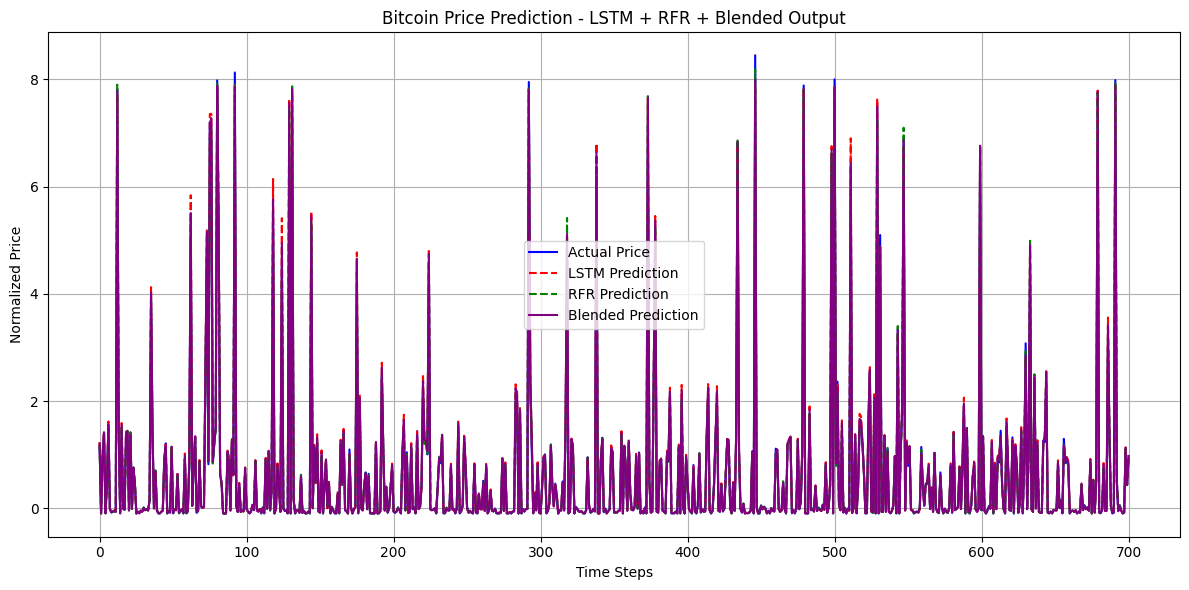

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, BatchNormalization, Attention, Input
from tensorflow.keras.losses import Huber
from arch import arch_model
from datetime import timedelta

# Load dataset
df = pd.read_csv(r"/kaggle/input/bitstampusd/BITSTAMP_BTCUSD 1D (1).csv", parse_dates=["time"], index_col="time")
df = df.head(3564)
# Ensure required columns are present
df = df[["open", "high", "low", "close"]]

# Feature Engineering: Calculate log returns
df['log_return'] = np.log(df['close'] / df['close'].shift(1))

# Apply GARCH(1,1) model to model volatility
df.dropna(inplace=True)  # Drop NaN values before fitting GARCH
df['log_return'] *= 100  # Rescale to improve convergence
garch_model = arch_model(df['log_return'], vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')
df['volatility'] = garch_result.conditional_volatility

# Normalize features using RobustScaler
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df.dropna())  # Ensures no NaNs during scaling

# Prepare dataset for CNN-LSTM
sequence_length = 60
X, y = [], []
for i in range(len(df_scaled) - sequence_length):
    X.append(df_scaled[i:i+sequence_length])
    y.append(df_scaled[i+sequence_length, 3])  # Predicting 'close' price

X, y = np.array(X), np.array(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Attention Layer
def attention_layer(inputs):
    return Attention()([inputs, inputs])

# Build CNN-LSTM Model with Attention using Functional API
inputs = Input(shape=(sequence_length, X.shape[2]))
conv_layer = Conv1D(filters=128, kernel_size=3, activation='relu')(inputs)
batch_norm = BatchNormalization()(conv_layer)
lstm_layer = LSTM(128, return_sequences=True)(batch_norm)
attention_output = attention_layer(lstm_layer)
dropout = Dropout(0.3)(attention_output)
lstm_layer2 = LSTM(64, return_sequences=False)(dropout)
outputs = Dense(1)(lstm_layer2)

# Define and compile the model
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=Huber(delta=1.0))

# Display model architecture
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# --- Prediction Phase ---

# Predict using LSTM model
y_pred_lstm = model.predict(X_test).squeeze()

# Train Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Predict using Random Forest
rfr_pred = rfr.predict(X_test.reshape(X_test.shape[0], -1))

# Blend predictions with weighted average
alpha = 0.6  # Weight for LSTM (can be tuned)
blended_pred = alpha * y_pred_lstm + (1 - alpha) * rfr_pred

# Predict next day's price using latest sequence
last_sequence = df_scaled[-sequence_length:].reshape(1, sequence_length, X.shape[2])
lstm_pred_next = model.predict(last_sequence)[0][0]
rfr_pred_next = rfr.predict(last_sequence.reshape(1, -1))[0]
blended_next = alpha * lstm_pred_next + (1 - alpha) * rfr_pred_next

# Inverse transform to get actual predicted 'close' price
dummy = np.zeros((1, df.shape[1]))
dummy[0, 3] = blended_next  # Only setting 'close' column
blended_next_actual = scaler.inverse_transform(dummy)[0][3]

# Estimate the next day's date
last_date = df.index[-1]
predicted_date = last_date + timedelta(days=1)

# Print predicted BTC price for next day
print(f"\n🔮 Predicted BTC/USD Closing Price for {predicted_date.date()}: ${blended_next_actual:.2f}")

# --- Visualization ---

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual Price", color='blue')
plt.plot(y_pred_lstm, label="LSTM Prediction", linestyle='dashed', color='red')
plt.plot(rfr_pred, label="RFR Prediction", linestyle='dashed', color='green')
plt.plot(blended_pred, label="Blended Prediction", linestyle='solid', color='purple')
plt.title("Bitcoin Price Prediction - LSTM + RFR + Blended Output")
plt.xlabel("Time Steps")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### pip install arch

In [4]:
from sklearn.metrics import r2_score
print(r2_score(y_test,rfr_pred))

0.9958628793376999


In [5]:
# Predict using LSTM
y_pred_lstm = model.predict(X_test)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Calculate evaluation metrics for LSTM model
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = math.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)

print(f"LSTM Model Evaluation:")
print(f" - MSE : {mse_lstm:.4f}")
print(f" - RMSE: {rmse_lstm:.4f}")
print(f" - MAE : {mae_lstm:.4f}")

# Calculate metrics for Random Forest Regressor
mse_rfr = mean_squared_error(y_test, rfr_pred)
rmse_rfr = math.sqrt(mse_rfr)
mae_rfr = mean_absolute_error(y_test, rfr_pred)

print(f"\nRandom Forest Regressor Evaluation:")
print(f" - MSE : {mse_rfr:.4f}")
print(f" - RMSE: {rmse_rfr:.4f}")
print(f" - MAE : {mae_rfr:.4f}")


LSTM Model Evaluation:
 - MSE : 0.0024
 - RMSE: 0.0488
 - MAE : 0.0313

Random Forest Regressor Evaluation:
 - MSE : 0.0012
 - RMSE: 0.0350
 - MAE : 0.0153


In [7]:
# Get the actual latest closing price (today's price)
actual_today_price = df['close'].iloc[-1]

# Print both values
print(f"📈 Actual BTC/USD Close Price Today ({df.index[-1].date()}): ${actual_today_price:.2f}")
print(f"🤖 Blended Predicted BTC/USD Close Price for Next Day ({predicted_date.date()}): ${blended_next_actual:.2f}")

# Optional: Show prediction error (only makes sense if next day's actual price is available later)
error = blended_next_actual - actual_today_price
print(f"🔍 Difference from Today’s Close: {error:.2f} USD ({(error / actual_today_price) * 100:.2f}%)")


📈 Actual BTC/USD Close Price Today (2025-04-17): $84626.00
🤖 Blended Predicted BTC/USD Close Price for Next Day (2025-04-18): $85161.63
🔍 Difference from Today’s Close: 535.63 USD (0.63%)
